## Imports

In [5]:
!pip install kmodes
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes

## Vizualise data in tabular format

In [6]:
cell_df = np.load('features_array.npy', allow_pickle=True)
columns = ["Neuron Name","Neuron_id", "gender", "age_class", "brain region", "species", "strain", "stain", "slicing thickness",
           "soma surface", "surface", "volume", "min age", "max age", "shrinkage reported"]

cells_df = pd.DataFrame(cell_df, columns = columns)
cells_df

,Neuron Name,Neuron_id,gender,age_class,brain region,species,strain,stain,slicing thickness,soma surface,surface,volume,min age,max age,shrinkage reported
0,wtsalF2935iba4_5,106384,-1.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,-1.0,2234.52,343.123,3.0,3.0,0.0
1,wtsalF2935iba4_4,106385,-1.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,-1.0,1581.95,249.51,3.0,3.0,0.0
2,wtsalF3068iba2_4,106386,-1.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,7.43803,2011.54,192.831,3.0,3.0,0.0
3,wtsalF2935iba1_1,106387,-1.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,54.0279,747.037,118.238,3.0,3.0,0.0
4,wtsalF2935iba2_5,106388,-1.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,-1.0,1214.19,194.51,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61117,MOL-DG-T-EXT-CAUDAL-C35,99202,1.0,adult,hippocampus,capuchin monkey,Not reported,immunostaining,100.0,214.998,721.171,115.237,4.0,4.0,1.0
61118,MOL-DG-T-EXT-CAUDAL-C36,99203,1.0,adult,hippocampus,capuchin monkey,Not reported,immunostaining,100.0,223.72,1232.67,268.383,4.0,4.0,1.0
61119,MOL-DG-T-EXT-CAUDAL-C37,99204,1.0,adult,hippocampus,capuchin monkey,Not reported,immunostaining,100.0,295.841,1544.65,425.934,4.0,4.0,1.0
61120,MOL-DG-T-EXT-CAUDAL-C38,99205,1.0,adult,hippocampus,capuchin monkey,Not reported,immunostaining,100.0,186.972,839.095,161.09,4.0,4.0,1.0


In [7]:
#convert data type to float
cell_df[:, 2] = cell_df[:, 2].astype(float)
cell_df[:, 8] = cell_df[:, 8].astype(float)
cell_df[:, 9] = cell_df[:, 9].astype(float)
cell_df[:, 10] = cell_df[:, 10].astype(float)
cell_df[:, 11] = cell_df[:, 11].astype(float)
cell_df[:, 12] = cell_df[:, 12].astype(float)
cell_df[:, 13] = cell_df[:, 13].astype(float)
cell_df[:, 14] = cell_df[:, 14].astype(float)

#convert to string
cell_df[:, 0] = cell_df[:, 0].astype(str)
cell_df[:, 1] = cell_df[:, 1].astype(str)
cell_df[:, 3] = cell_df[:, 3].astype(str)
cell_df[:, 4] = cell_df[:, 4].astype(str)
cell_df[:, 5] = cell_df[:, 5].astype(str)
cell_df[:, 6] = cell_df[:, 6].astype(str)
cell_df[:, 7] = cell_df[:, 7].astype(str)

## KPrototypes Clustering

In [8]:
kproto = KPrototypes(n_clusters = 5, verbose = 2, max_iter = 20)
clusters = kproto.fit_predict(cell_df, categorical = [0,1,2,3,4,5,6,7])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 9601, ncost: 236844857483.57123
Run: 1, iteration: 2/20, moves: 4647, ncost: 229642245135.10464
Run: 1, iteration: 3/20, moves: 3333, ncost: 228362069717.91174
Run: 1, iteration: 4/20, moves: 2625, ncost: 227293282918.54892
Run: 1, iteration: 5/20, moves: 2367, ncost: 226078491916.57196
Run: 1, iteration: 6/20, moves: 2164, ncost: 224457703969.8419
Run: 1, iteration: 7/20, moves: 2110, ncost: 222285905272.68036
Run: 1, iteration: 8/20, moves: 2085, ncost: 217899386016.79123
Run: 1, iteration: 9/20, moves: 1989, ncost: 208

In [9]:
print(kproto.cluster_centroids_)

[['86.36034937469869' '70.54767856345136' '977.1635009565231'
  '336.04331438970115' '12.2765703428523' '13.42626549074106'
  '0.8712247965289397' '009-4wk-NPC-IBA1--CD68-CALB-63X-2' '106387' '0.0'
  'adult' 'neocortex' 'mouse' 'B6;CBA-Tg(Camk2a-tTA)1Mmay/J'
  'immunostaining']
 ['94.20904600750023' '33.74834801916201' '2841.9168009695763'
  '1126.221852638804' '6.849474069331376' '8.151198207262452'
  '0.9872404646483125' '1-CTR_2w_Female_HIP_2' '106384' '1.0' 'adult'
  'neocortex' 'mouse' 'C57BL/6J' 'immunostaining']
 ['286.0' '3883.498000000088' '85730.53999999935' '157537.05999999904'
  '21.0' '22.2' '0.4' 'DG-gran-2' '117261' '1.0' 'young adult'
  'hippocampus' 'rat' 'Wistar' 'immunostaining']
 ['101.44927536231884' '8087.958905797096' '25295.985507246405'
  '25431.76329710139' '40.710144927536234' '41.242753623188406'
  '0.9565217391304348' '13_90' '110264' '0.0' 'young' 'neocortex' 'mouse'
  'CX3CR1gfp/+' 'green fluorescent protein']
 ['91.0447198275862' '200.9230706928882' '608

In [10]:
cluster_dict = []
for cluster in clusters:
    cluster_dict.append(cluster)
cells_df['cluster'] = cluster_dict

In [11]:
cells_df[cells_df['cluster']==0].head(20)

,Neuron Name,Neuron_id,gender,age_class,brain region,species,strain,stain,slicing thickness,soma surface,surface,volume,min age,max age,shrinkage reported,cluster
1,wtsalF2935iba4_4,106385,-1.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,-1.0,1581.95,249.51,3.0,3.0,0.0,0
2,wtsalF3068iba2_4,106386,-1.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,7.43803,2011.54,192.831,3.0,3.0,0.0,0
3,wtsalF2935iba1_1,106387,-1.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,54.0279,747.037,118.238,3.0,3.0,0.0,0
4,wtsalF2935iba2_5,106388,-1.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,-1.0,1214.19,194.51,3.0,3.0,0.0,0
5,wtsalF3068iba4_5,106389,-1.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,27.1444,894.98,81.0774,3.0,3.0,0.0,0
6,wtsalF3035iba1_1,106390,-1.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,38.3544,909.485,143.959,3.0,3.0,0.0,0
11,5_40,106395,0.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,110.55,1880.06,372.348,3.0,3.0,0.0,0
15,2_49,106399,0.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,52.0588,614.795,125.075,3.0,3.0,0.0,0
17,3_46,106401,0.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,52.4768,519.179,109.851,3.0,3.0,0.0,0
19,4_45,106403,0.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,61.8094,1190.91,235.4,3.0,3.0,0.0,0


In [12]:
cells_df[cells_df['cluster']==1].head(20)

,Neuron Name,Neuron_id,gender,age_class,brain region,species,strain,stain,slicing thickness,soma surface,surface,volume,min age,max age,shrinkage reported,cluster
0,wtsalF2935iba4_5,106384,-1.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,-1.0,2234.52,343.123,3.0,3.0,0.0,1
7,2_53,106391,0.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,-1.0,3035.98,622.091,3.0,3.0,0.0,1
8,3_45,106392,0.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,40.055,2227.67,464.34,3.0,3.0,0.0,1
9,7_38,106393,0.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,40.8647,2549.14,495.955,3.0,3.0,0.0,1
10,1_47,106394,0.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,78.0885,3948.05,757.896,3.0,3.0,0.0,1
12,2_52,106396,0.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,17.3497,3872.3,765.702,3.0,3.0,0.0,1
13,3_44,106397,0.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,69.1465,3474.37,661.792,3.0,3.0,0.0,1
14,4_44,106398,0.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,66.1989,3911.7,766.092,3.0,3.0,0.0,1
16,2_50,106400,0.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,38.0045,3031.02,609.336,3.0,3.0,0.0,1
18,2_51,106402,0.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,53.8657,3397.08,683.993,3.0,3.0,0.0,1


In [13]:
cells_df[cells_df['cluster']==2].head(25)

,Neuron Name,Neuron_id,gender,age_class,brain region,species,strain,stain,slicing thickness,soma surface,surface,volume,min age,max age,shrinkage reported,cluster
946,WT-microglia,117261,0.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,40.0,-1.0,60407.7,92229.9,9.0,9.0,1.0,2
947,PS19-microglia,117263,0.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,40.0,-1.0,86896.6,192829.0,9.0,9.0,1.0,2
56698,DG-gran-2,78217,1.0,young adult,hippocampus,rat,Wistar,immunostaining,450.0,4574.12,58761.8,95948.4,29.0,31.0,0.0,2
56717,DG-inner-mol-3,78236,1.0,young adult,hippocampus,rat,Wistar,immunostaining,450.0,7219.0,92524.6,175073.0,29.0,31.0,0.0,2
56734,DG-outer-mol-2,78253,1.0,young adult,hippocampus,rat,Wistar,immunostaining,450.0,7626.37,130062.0,231605.0,29.0,31.0,0.0,2


In [17]:
cells_df[cells_df['cluster']==4].head(25)

,Neuron Name,Neuron_id,gender,age_class,brain region,species,strain,stain,slicing thickness,soma surface,surface,volume,min age,max age,shrinkage reported,cluster
584,MAX_A4CA_prelim,110275,-1.0,young adult,neocortex,mouse,CX3CR1gpf/+,Not reported,250.0,20860.0,10832.5,10832.5,18.0,23.0,1.0,4
595,MAX_A4SB_prelim,110286,-1.0,young adult,basal ganglia,mouse,CX3CR1gpf/+,Not reported,250.0,13471.6,8197.42,8197.42,18.0,23.0,1.0,4
1159,P120-CXM28x2-Mark2WT-CX3CR1Het-2,118876,0.0,adult,neocortex,mouse,CX3CR1gfp/+,green fluorescent protein,70.0,5650.71,13728.8,8923.73,120.0,120.0,1.0,4
1170,P120-CXM28x2-Mark2WT-CX3CR1Het-4,118888,0.0,adult,neocortex,mouse,CX3CR1gfp/+,green fluorescent protein,70.0,4299.2,13485.2,8765.39,120.0,120.0,1.0,4
1177,P120-CXM31x1-Mark2WT-CX3CR1Het-1,118895,0.0,adult,neocortex,mouse,CX3CR1gfp/+,green fluorescent protein,70.0,3891.15,16794.5,8271.29,120.0,120.0,1.0,4
1200,P120-CXM35x1x1-Mark2Het-CX3CR1Het-1,118918,0.0,adult,neocortex,mouse,CX3CR1gfp/+,green fluorescent protein,70.0,4822.68,13766.6,9705.47,120.0,120.0,1.0,4
1205,P120-CXM35x1x1-Mark2Het-CX3CR1Het-3,118923,0.0,adult,neocortex,mouse,CX3CR1gfp/+,green fluorescent protein,70.0,5608.56,11242.8,7926.2,120.0,120.0,1.0,4
1211,P120-CXM35x1x1-Mark2Het-CX3CR1Het-2,118929,0.0,adult,neocortex,mouse,CX3CR1gfp/+,green fluorescent protein,70.0,5338.44,12913.1,9103.74,120.0,120.0,1.0,4
1215,P30-WCM2x1-Mark2WT-CX3CR1Het-4,118933,0.0,young adult,neocortex,mouse,CX3CR1gfp/+,green fluorescent protein,70.0,4346.86,14567.7,11362.8,30.0,30.0,1.0,4
1245,P30-WCM3x4-Mark2WT-CX3CR1Het-3,118963,0.0,young adult,neocortex,mouse,CX3CR1gfp/+,green fluorescent protein,70.0,7800.99,13983.1,7900.45,30.0,30.0,1.0,4


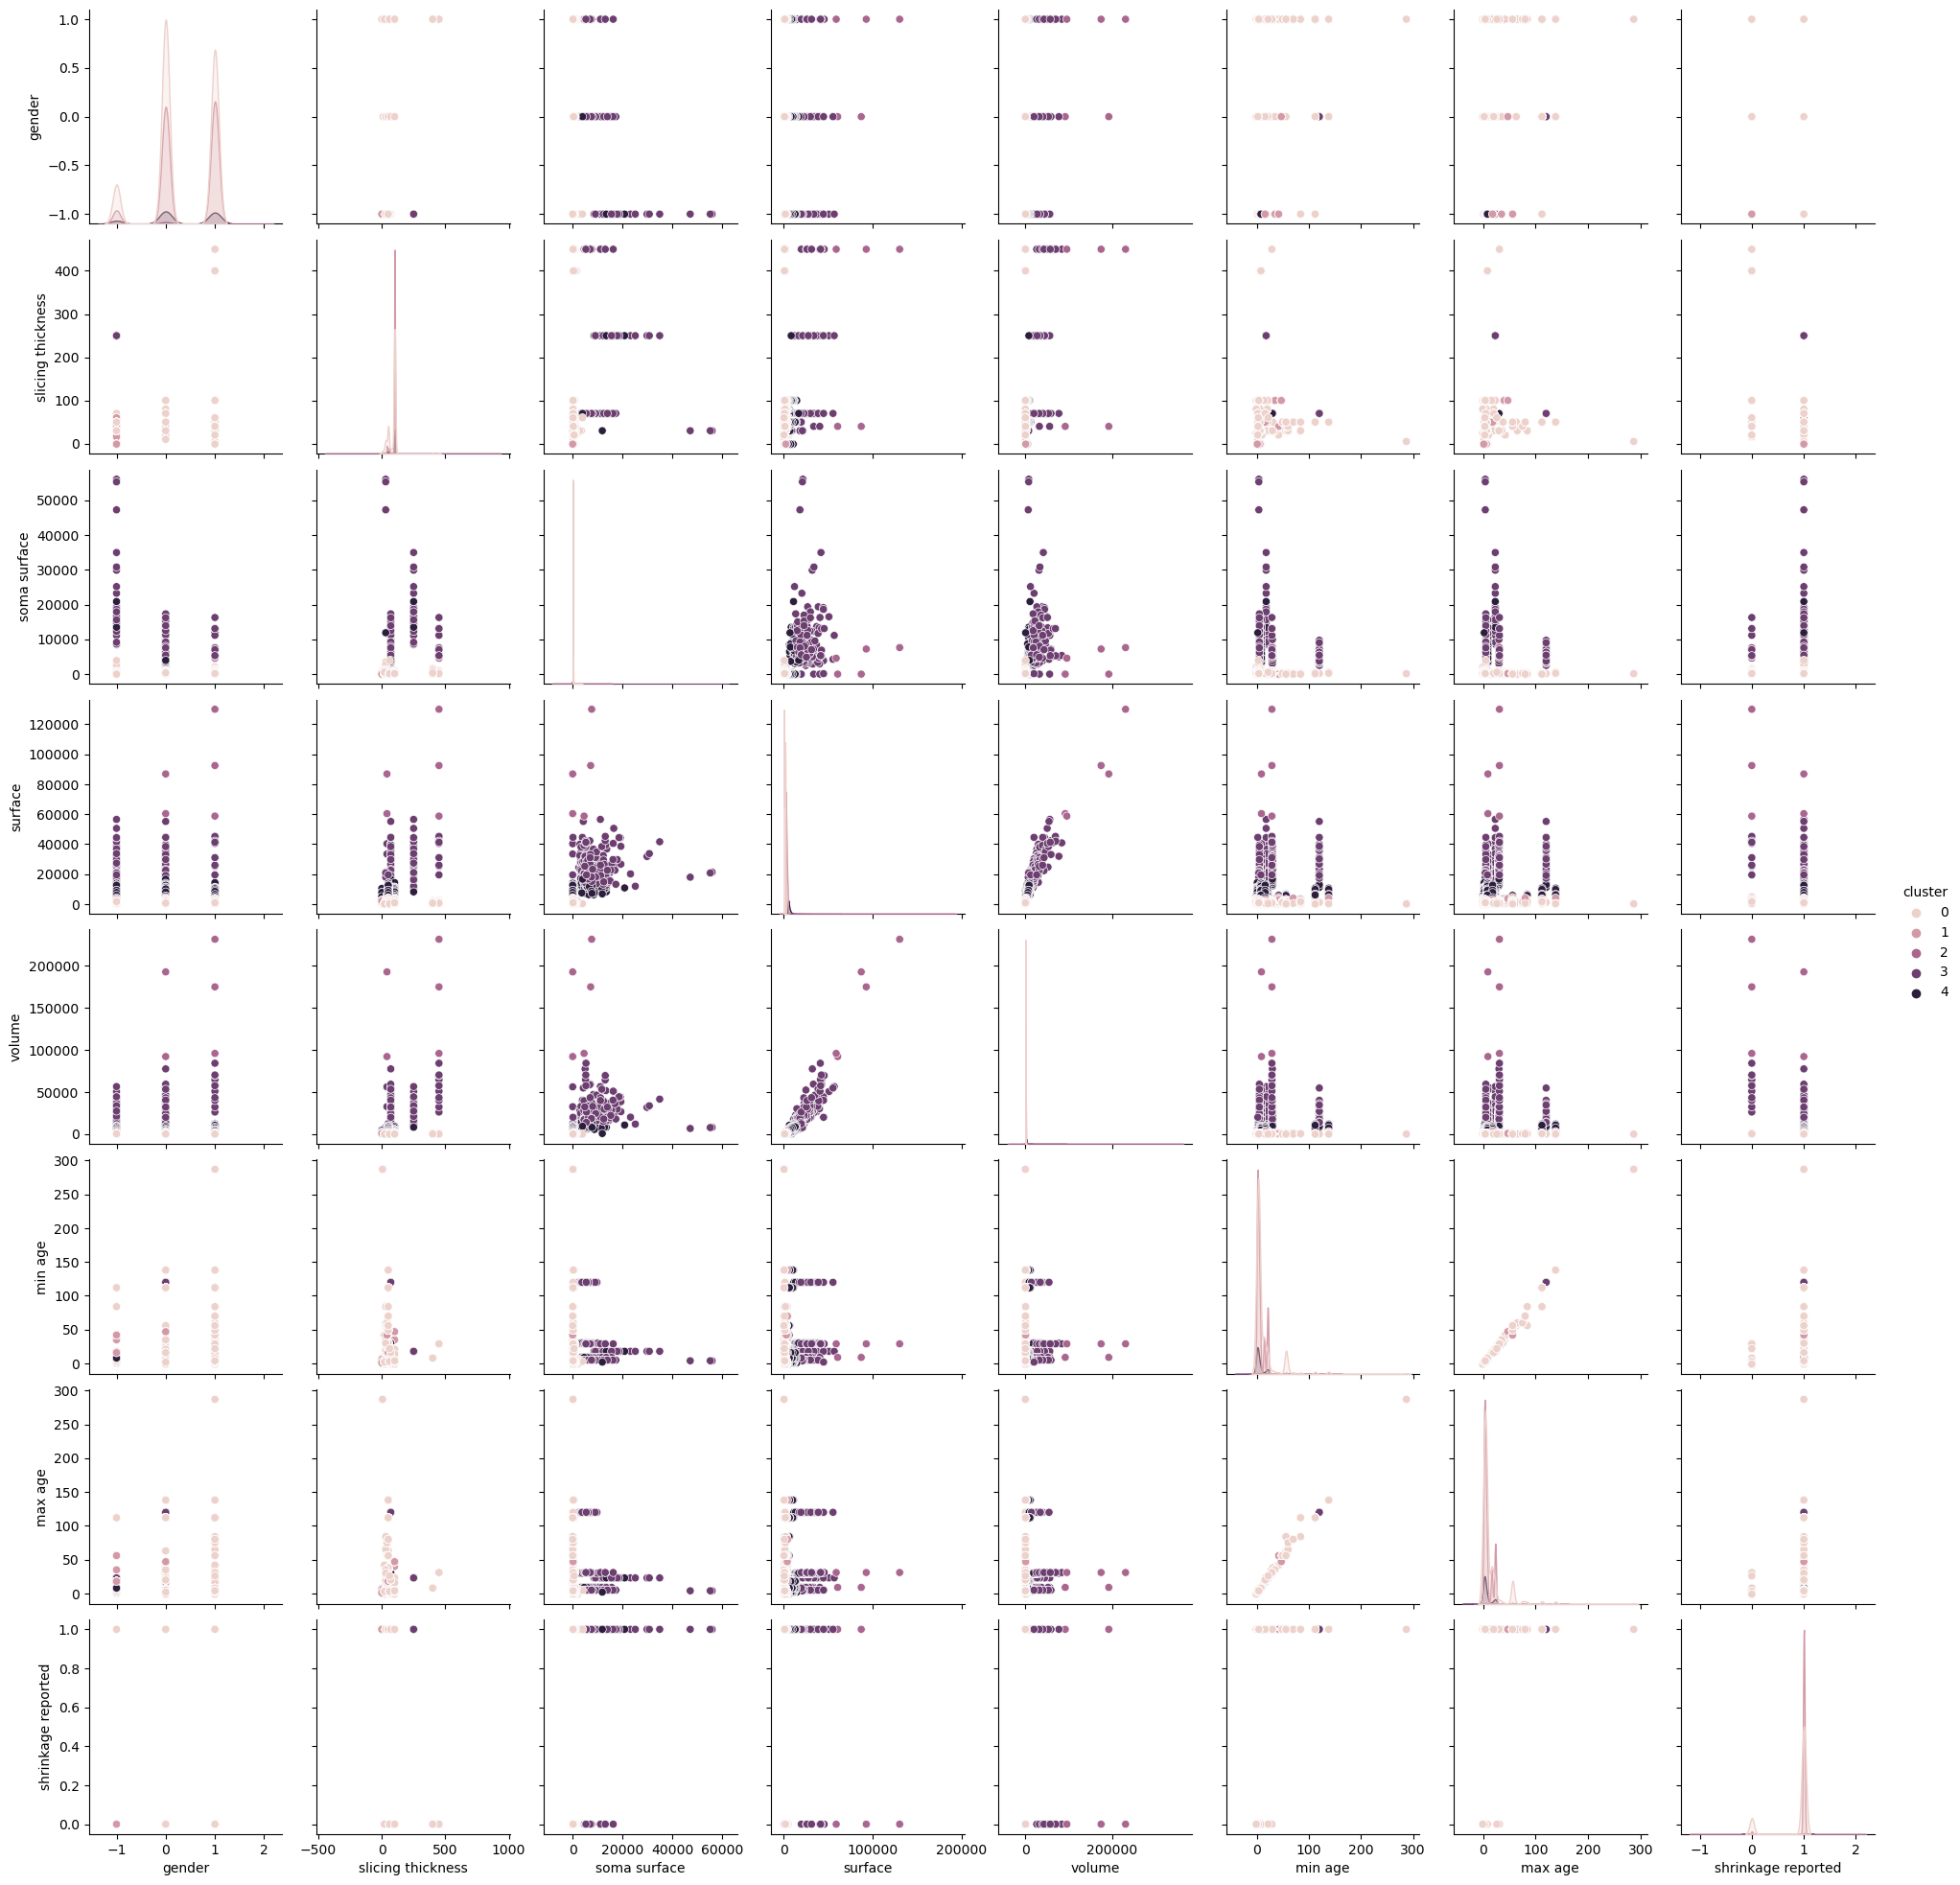

In [18]:
import seaborn as sns

sns.pairplot(cells_df, hue='cluster')

The pairplot shows the pairwise relationships between the variables in the dataset, using a variety of different plot types. The plot types used in this pairplot are:

* Scatter plot: Shows the relationship between two continuous variables.
* Heatmap: Shows the correlation between two variables.
* Histogram: Shows the distribution of a continuous variable.
* Kernel density estimate (KDE): Shows the distribution of a continuous variable, smoothed using a kernel function.

To interpret the pairplot, we should look at each plot individually and look for patterns and trends. For example, we can look for:

* **Correlation:** The heatmap shows the correlation between each pair of variables. A high correlation indicates that the two variables are closely related, while a low correlation indicates that they are not closely related.
* **Linear relationships:** The scatter plots show the relationship between each pair of continuous variables. We can look for linear relationships, which are indicated by a straight line on the scatter plot.
* **Non-linear relationships:** The scatter plots can also show non-linear relationships, such as curves or parabolas.
* **Outliers:** The histograms and KDE plots can show us outliers, which are data points that are significantly different from the rest of the data.

In the specific pairplot you have provided, there are a few things that stand out:

* The **age** and **slicing thickness** variables appear to have a non-linear relationship, with older patients having thinner slices.
* The **gender** and **max age** variables appear to be correlated, with male patients tending to be older than female patients.
* There is a cluster of patients with high **soma surface shrinkage**, **max age**, and **slicing thickness**. This cluster may represent a specific group of patients with a particular condition.

Overall, the pairplot provides a useful overview of the relationships between the variables in the dataset. By looking for patterns and trends in the data, we can gain insights into the relationships between the variables and identify potential outliers.

In [20]:
kproto2 = KPrototypes(n_clusters = 6, verbose = 2, max_iter = 20)
clusters2 = kproto2.fit_predict(cell_df, categorical = [0,1,2,3,4,5,6,7])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 14461, ncost: 240655931358.43372
Run: 1, iteration: 2/20, moves: 4383, ncost: 221210307060.28687
Run: 1, iteration: 3/20, moves: 1859, ncost: 216621185828.86536
Run: 1, iteration: 4/20, moves: 1196, ncost: 213160414774.9584
Run: 1, iteration: 5/20, moves: 1205, ncost: 207594630725.13187
Run: 1, iteration: 6/20, moves: 1621, ncost: 195851223593.70358
Run: 1, iteration: 7/20, moves: 2040, ncost: 183385398259.90536
Run: 1, iteration: 8/20, moves: 2189, ncost: 169059750207.69458
Run: 1, iteration: 9/20, moves: 2050, ncost: 157264560625.64932
Run: 1, iteration: 10/20, moves: 2040, ncost: 146816749395.74417
Run: 1, iteration: 11/20, moves: 1881, ncost: 142545967346.70282
Run: 1, iteration: 12/20

In [21]:
cluster_dict2 = []
for cluster in clusters2:
    cluster_dict2.append(cluster)
cells_df['cluster'] = cluster_dict2

In [22]:
cells_df[cells_df['cluster']==0].head(20)

,Neuron Name,Neuron_id,gender,age_class,brain region,species,strain,stain,slicing thickness,soma surface,surface,volume,min age,max age,shrinkage reported,cluster
579,MAX_B1CB_prelim,110270,-1.0,young adult,neocortex,mouse,CX3CR1gpf/+,Not reported,250.0,14096.5,15435.5,15435.5,18.0,23.0,1.0,0
584,MAX_A4CA_prelim,110275,-1.0,young adult,neocortex,mouse,CX3CR1gpf/+,Not reported,250.0,20860.0,10832.5,10832.5,18.0,23.0,1.0,0
585,MAX_a4cb_prelim,110276,-1.0,young adult,neocortex,mouse,CX3CR1gpf/+,Not reported,250.0,25158.3,11951.3,11951.3,18.0,23.0,1.0,0
595,MAX_A4SB_prelim,110286,-1.0,young adult,basal ganglia,mouse,CX3CR1gpf/+,Not reported,250.0,13471.6,8197.42,8197.42,18.0,23.0,1.0,0
1154,P120-CXM28x2-Mark2WT-CX3CR1Het-3,118871,0.0,adult,neocortex,mouse,CX3CR1gfp/+,green fluorescent protein,70.0,4077.44,21297.9,13843.6,120.0,120.0,1.0,0
1159,P120-CXM28x2-Mark2WT-CX3CR1Het-2,118876,0.0,adult,neocortex,mouse,CX3CR1gfp/+,green fluorescent protein,70.0,5650.71,13728.8,8923.73,120.0,120.0,1.0,0
1162,P120-CXM28x1-Mark2WT-CX3CR1Het-2,118879,0.0,adult,neocortex,mouse,CX3CR1gfp/+,green fluorescent protein,70.0,4366.82,18515.1,12127.4,120.0,120.0,1.0,0
1170,P120-CXM28x2-Mark2WT-CX3CR1Het-4,118888,0.0,adult,neocortex,mouse,CX3CR1gfp/+,green fluorescent protein,70.0,4299.2,13485.2,8765.39,120.0,120.0,1.0,0
1173,P120-CXM28x1-Mark2WT-CX3CR1Het-1,118891,0.0,adult,neocortex,mouse,CX3CR1gfp/+,green fluorescent protein,70.0,4939.81,21032.1,13776.0,120.0,120.0,1.0,0
1177,P120-CXM31x1-Mark2WT-CX3CR1Het-1,118895,0.0,adult,neocortex,mouse,CX3CR1gfp/+,green fluorescent protein,70.0,3891.15,16794.5,8271.29,120.0,120.0,1.0,0


In [23]:
cells_df[cells_df['cluster']==5].head(20)

,Neuron Name,Neuron_id,gender,age_class,brain region,species,strain,stain,slicing thickness,soma surface,surface,volume,min age,max age,shrinkage reported,cluster
1,wtsalF2935iba4_4,106385,-1.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,-1.0,1581.95,249.51,3.0,3.0,0.0,5
3,wtsalF2935iba1_1,106387,-1.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,54.0279,747.037,118.238,3.0,3.0,0.0,5
4,wtsalF2935iba2_5,106388,-1.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,-1.0,1214.19,194.51,3.0,3.0,0.0,5
5,wtsalF3068iba4_5,106389,-1.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,27.1444,894.98,81.0774,3.0,3.0,0.0,5
6,wtsalF3035iba1_1,106390,-1.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,38.3544,909.485,143.959,3.0,3.0,0.0,5
15,2_49,106399,0.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,52.0588,614.795,125.075,3.0,3.0,0.0,5
17,3_46,106401,0.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,52.4768,519.179,109.851,3.0,3.0,0.0,5
19,4_45,106403,0.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,61.8094,1190.91,235.4,3.0,3.0,0.0,5
20,2_48,106404,0.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,25.3837,1178.09,244.249,3.0,3.0,0.0,5
28,4_43,106412,0.0,adult,hippocampus,mouse,C57BL/6J,immunostaining,16.0,124.948,1641.35,319.018,3.0,3.0,0.0,5


In [30]:
sns.pairplot(cells_df, hue='cluster')

Clustering is heavily dependent on variables like **age, brain region, strain, stain, slicing thickness, min-max age**. Which means that the data points in a particular cluster mostly belong to the same type of age range or brain region. Some reasond why this might be possible:
- Age: means that data points with similar ages are more likely to be grouped together. This can be useful when studying age-related phenomena or differences in brain data across different age groups.

- Brain Region: Clustering based on brain region implies that data points collected from the same or similar brain regions will be grouped together.

- Strain: clustering is based on the genetic background of the samples in data.

- Stain: the staining techniques used in experiments, different staining methods lead to variations in data characteristics.

- Slicing Thickness: Clustering by slicing thickness can help understand how this variable affects your results.

- Min-Max Age: Clustering based on a range of ages, defined by a minimum and maximum age, is useful for studying how data patterns change across different age groups within a specified range.